In [1]:
import data
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd

import librosa
import librosa.display

from IPython.display import Audio

import os

In [2]:
path_ds = '/home/edoardobucheli/Datasets/freesound-audio-tagging-2019/'


part = 'wave'
batch_size = 32
transformation = 'mel'
normalize=True
sr = 16000
len_sec = 2
frame_length=512
frame_step=256
fft_length=512
n_mels=40
n_mfcc=40
mel_lower_edge=125
mel_upper_edge=8000

### Make Dataset

In [3]:
dataset = data.create_and_batch_dataset_freesound(path_ds,
                                                  part = part,
                                                  batch_size = batch_size,
                                                  transformation = transformation,
                                                  normalize = normalize,
                                                  sr=sr,
                                                  len_sec=len_sec,
                                                  frame_length=frame_length,
                                                  frame_step=frame_step,
                                                  fft_length=fft_length,
                                                  n_mels=n_mels,
                                                  n_mfcc=n_mfcc,
                                                  mel_lower_edge=mel_lower_edge,
                                                  mel_upper_edge=mel_upper_edge)

UnboundLocalError: local variable 'names_paths' referenced before assignment

### Define Iterator

In [14]:
iterator = dataset.make_initializable_iterator()
next_step = iterator.get_next()

### Get Next Batch

In [15]:
with tf.Session() as sess:
    sess.run(iterator.initializer)
    
    this_rep,this_labels = sess.run(next_step)

### Display

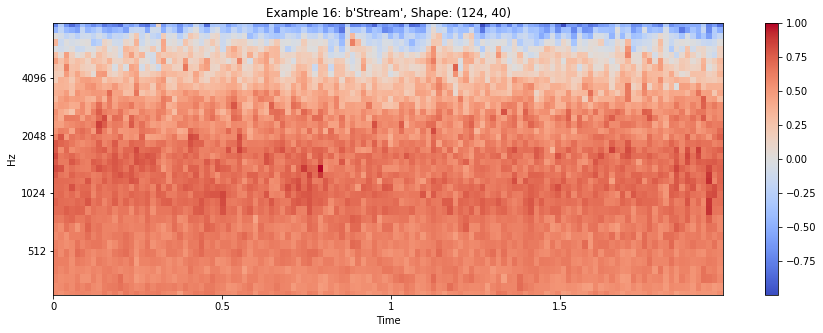

In [16]:
n = np.random.randint(0,32)
#n=4
plt.figure(figsize = (15,5))

if transformation == 'wave':
    librosa.display.waveplot(this_rep[n].squeeze(0),sr=sr)
    plt.title('Example {}: {}, Size: {}'.format(n,this_labels[n],len(this_rep[n].squeeze(0))))

elif transformation == 'mag':
    librosa.display.specshow(this_rep[n].squeeze(0).T,x_axis='time',y_axis='linear',sr=sr,hop_length=256)
    plt.colorbar()
    plt.title('Example {}: {}, Shape: {}'.format(n,this_labels[n],this_rep[n].squeeze(0).shape))
elif transformation == 'mel' or 'mfcc':
    librosa.display.specshow(this_rep[n].T,sr=sr,x_axis = 'time',y_axis = 'mel',fmin=mel_lower_edge,fmax=mel_upper_edge,hop_length=256)
    plt.colorbar()
    plt.title('Example {}: {}, Shape: {}'.format(n,this_labels[n],this_rep[n].shape))
    